17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.7540 - loss: 0.5371 - val_accuracy: 0.8774 - val_loss: 0.3025
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9262 - loss: 0.2008 - val_accuracy: 0.8790 - val_loss: 0.3034
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9553 - loss: 0.1397 - val_accuracy: 0.8780 - val_loss: 0.3285
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9672 - loss: 0.1017 - val_accuracy: 0.8691 - val_loss: 0.3776
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9802 - loss: 0.0718 - val_accuracy: 0.8607 - val_loss: 0.4483
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9895 - loss: 0.0474 - val_accuracy: 0.8624 - val_loss: 0.5013
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9946 - loss: 0.0286 - val_accuracy: 0.8604 - val_loss: 0.5619
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9985 - loss: 0.0153 - val_accuracy: 0.8576 -

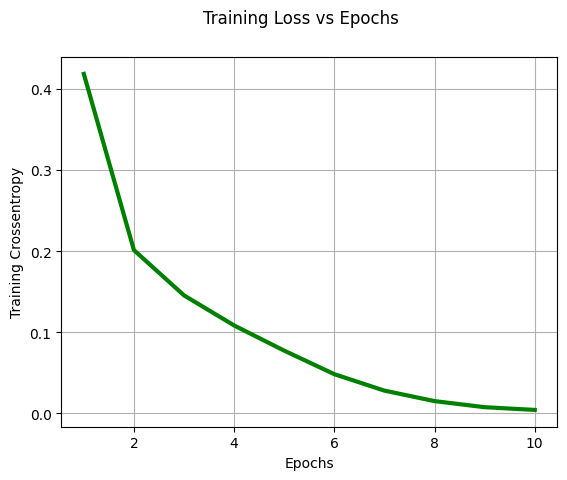

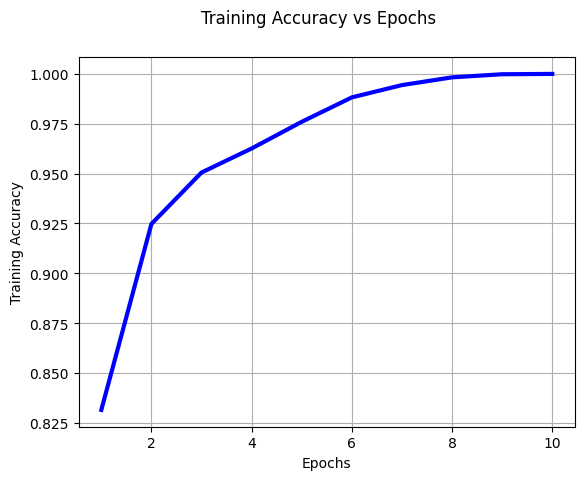

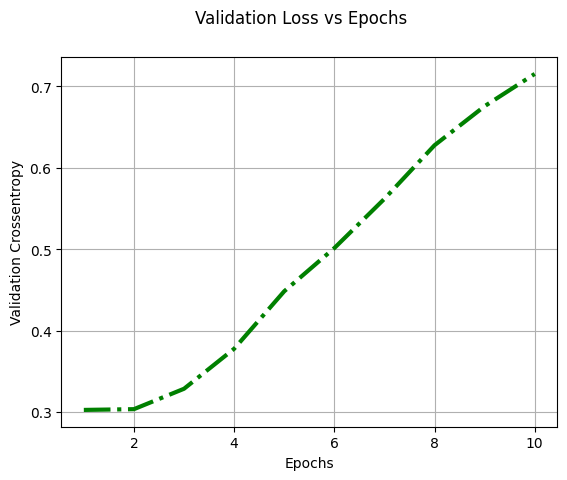

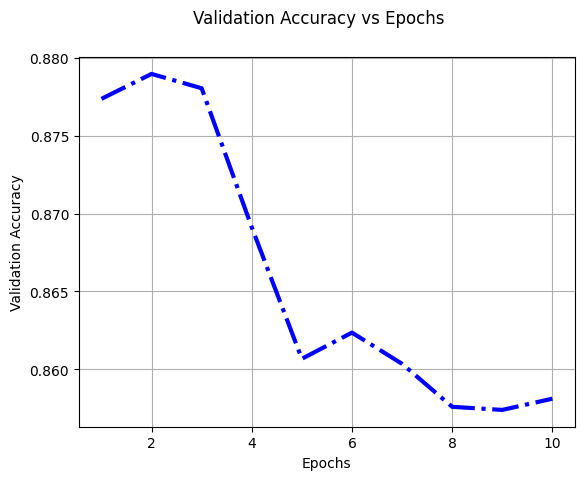

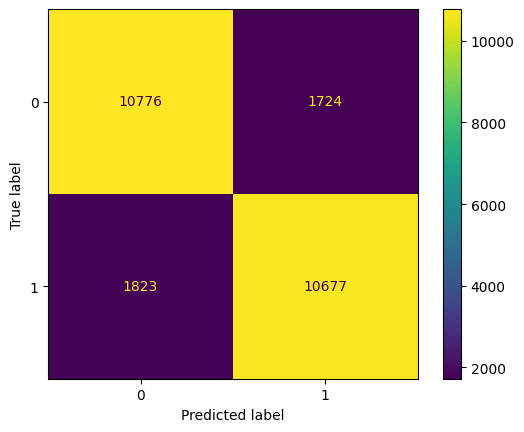

In [ ]:

from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=10000)

def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        results[i, sequences[i]] = 1.0
    return results

Xtrain = vectorize(Xtrain)

model = Sequential()
model.add(Dense(50, input_dim=10000, activation="relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


history = model.fit(Xtrain, ytrain, epochs=10, batch_size=550, validation_data=(vectorize(Xtest), ytest))

Xtest = vectorize(Xtest)
ypred = model.predict(Xtest)
ypred = np.round(ypred)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')

cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')

plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()